In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [110]:
data = pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\NPTEL\Datasets\Cars_V2_data.csv")

In [111]:
# Exploring dataset
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,Engine Size,Cylinders,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase,Length (IN)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(L),NaN,NaN,NaN,NaN,NaN,(IN),NaN
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265.0,17.0,23.0,4451.0,106,189.0
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2,4,200.0,24.0,31.0,2778.0,101,172.0
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200.0,22.0,29.0,3230.0,105,183.0
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270.0,20.0,28.0,3575.0,108,186.0


In [112]:
# Knowing that the data set is small
data.shape

(429, 15)

In [113]:
# Type of variables
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'Engine Size', 'Cylinders', 'Horsepower', 'MPG (City)', 'MPG (Highway)',
       'Weight (LBS)', 'Wheelbase', 'Length (IN)'],
      dtype='object')

In [114]:
# Summary stats.
data.describe()

,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Length (IN)
count,428.000000,428.000000,428.000000,428.000000,428.000000
mean,215.885514,20.060748,26.843458,3577.953271,186.362150
std,71.836032,5.238218,5.741201,758.983215,14.357991
min,73.000000,10.000000,12.000000,1850.000000,143.000000
25%,165.000000,17.000000,24.000000,3104.000000,178.000000
50%,210.000000,19.000000,26.000000,3474.500000,187.000000
75%,255.000000,21.250000,29.000000,3977.750000,194.000000
max,500.000000,60.000000,66.000000,7190.000000,238.000000


In [115]:
# Data type and general info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           428 non-null    object 
 1   Model          428 non-null    object 
 2   Type           428 non-null    object 
 3   Origin         428 non-null    object 
 4   DriveTrain     428 non-null    object 
 5   MSRP           428 non-null    object 
 6   Invoice        428 non-null    object 
 7   Engine Size    429 non-null    object 
 8   Cylinders      428 non-null    object 
 9   Horsepower     428 non-null    float64
 10  MPG (City)     428 non-null    float64
 11  MPG (Highway)  428 non-null    float64
 12  Weight (LBS)   428 non-null    float64
 13  Wheelbase      429 non-null    object 
 14  Length (IN)    428 non-null    float64
dtypes: float64(5), object(10)
memory usage: 50.4+ KB


In [116]:
# Drop unwanted columns
unwanted_columns = ['MSRP','Invoice']
data = data.drop(unwanted_columns,axis = 1)

In [117]:
# Checking dataset
data.head()

,Make,Model,Type,Origin,DriveTrain,Engine Size,Cylinders,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase,Length (IN)
0,NaN,NaN,NaN,NaN,NaN,(L),NaN,NaN,NaN,NaN,NaN,(IN),NaN
1,Acura,MDX,SUV,Asia,All,3.5,6,265.0,17.0,23.0,4451.0,106,189.0
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,2,4,200.0,24.0,31.0,2778.0,101,172.0
3,Acura,TSX 4dr,Sedan,Asia,Front,2.4,4,200.0,22.0,29.0,3230.0,105,183.0
4,Acura,TL 4dr,Sedan,Asia,Front,3.2,6,270.0,20.0,28.0,3575.0,108,186.0


In [118]:
# Sorting the dataset with respect to the MPG
sorted_data = data.sort_values(by = "MPG (City)", ascending = False).head()

In [119]:
# Checking the sorted dataset
sorted_data

,Make,Model,Type,Origin,DriveTrain,Engine Size,Cylinders,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase,Length (IN)
151,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,2,3,73.0,60.0,66.0,1850.0,95,155.0
374,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,1.5,4,110.0,59.0,51.0,2890.0,106,175.0
150,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,1.4,4,93.0,46.0,51.0,2732.0,103,175.0
405,Volkswagen,Jetta GLS TDI 4dr,Sedan,Europe,Front,1.9,4,100.0,38.0,46.0,3003.0,99,172.0
156,Honda,Civic HX 2dr,Sedan,Asia,Front,1.7,4,117.0,36.0,44.0,2500.0,103,175.0


In [121]:
# Knowing the model which gives very high MPG in city, greater than 50 MPG
data[data["MPG (City)"] > 50]

,Make,Model,Type,Origin,DriveTrain,Engine Size,Cylinders,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Wheelbase,Length (IN)
151,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,2,3,73.0,60.0,66.0,1850.0,95,155.0
374,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,1.5,4,110.0,59.0,51.0,2890.0,106,175.0


In [143]:
# Function for knowing the minimum and maximum values of a column containing numeric values

def min_max_values(column_name):
    '''This function takes a column name as an argument and returns a max and minimum 
    observations in the dataset'''
    
    ID_of_maximum_value = data[column_name].idxmax() #Gets the Index of the max value
    maximum_observations = pd.DataFrame(data.loc[ID_of_maximum_value]) #Gets the values from the specific location and displays it as a dataframe 
    
    ID_of_minimum_value = data[column_name].idxmin() #Gets the Index of the max value
    minimum_observatios = pd.DataFrame(data.loc[ID_of_minimum_value]) #Gets the values from the specific location and displays it as a dataframe
    
    minimum_maximum_observations = pd.concat([maximum_observations,minimum_observatios],axis = 1)#Concatinating both the dataframes
    
    return minimum_maximum_observations

Very important function that automates a very important analysis

In [144]:
# Checking
min_max_values("Weight (LBS)")

,119,151
Make,Ford,Honda
Model,Excursion 6.8 XLT,Insight 2dr (gas/electric)
Type,SUV,Hybrid
Origin,USA,Asia
DriveTrain,All,Front
Engine Size,6.8,2
Cylinders,10,3
Horsepower,310,73
MPG (City),10,60
MPG (Highway),13,66


In [145]:
# Checking
min_max_values("MPG (City)")

,151,119
Make,Honda,Ford
Model,Insight 2dr (gas/electric),Excursion 6.8 XLT
Type,Hybrid,SUV
Origin,Asia,USA
DriveTrain,Front,All
Engine Size,2,6.8
Cylinders,3,10
Horsepower,73,310
MPG (City),60,10
MPG (Highway),66,13


In [152]:
data.loc[151]

Make                                  Honda
Model            Insight 2dr (gas/electric)
Type                                 Hybrid
Origin                                 Asia
DriveTrain                            Front
Engine Size                               2
Cylinders                                 3
Horsepower                               73
MPG (City)                               60
MPG (Highway)                            66
Weight (LBS)                           1850
Wheelbase                                95
Length (IN)                             155
Name: 151, dtype: object

(array([ 31., 195., 142.,  44.,   9.,   4.,   0.,   1.,   0.,   2.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <a list of 10 Patch objects>)

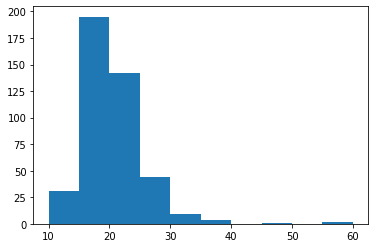

In [157]:
# Histogram of contineous data

plt.hist(data["MPG (City)"],10)

Outliers are seen

(array([  2.,  16.,  13.,  48., 110.,  37.,  95.,  25.,  22.,  31.,   6.,
          7.,   1.,   8.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([10.        , 11.66666667, 13.33333333, 15.        , 16.66666667,
        18.33333333, 20.        , 21.66666667, 23.33333333, 25.        ,
        26.66666667, 28.33333333, 30.        , 31.66666667, 33.33333333,
        35.        , 36.66666667, 38.33333333, 40.        , 41.66666667,
        43.33333333, 45.        , 46.66666667, 48.33333333, 50.        ,
        51.66666667, 53.33333333, 55.        , 56.66666667, 58.33333333,
        60.        ]),
 <a list of 30 Patch objects>)

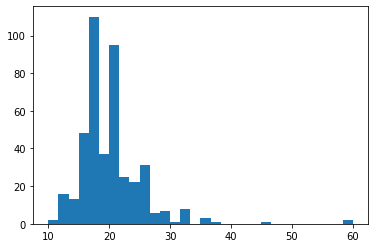

In [156]:
plt.(data["MPG (City)"],30)

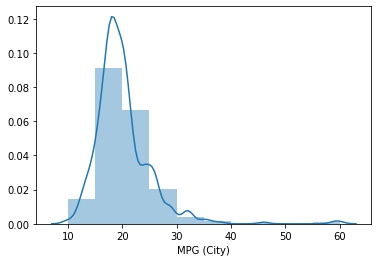

In [159]:
# Probability density curve, the area under curve is always 1 
sns.distplot(data["MPG (City)"],10)

In [166]:
# Count by category
categeries = data.groupby("Make").size()

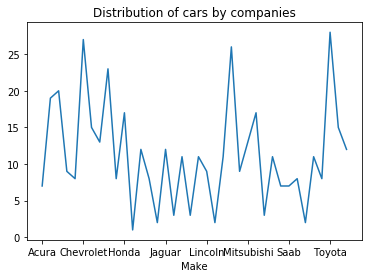

In [169]:
# Distribution of categorical variables
categeries.plot(title = "Distribution of cars by companies") # To know if there is more concentration in one category

In [172]:
# Selecting only numerical variables
numerical_data = data.select_dtypes(include = ["float64","int64"])

In [173]:
# Checking
numerical_data.head()

,Horsepower,MPG (City),MPG (Highway),Weight (LBS),Length (IN)
0,NaN,NaN,NaN,NaN,NaN
1,265.0,17.0,23.0,4451.0,189.0
2,200.0,24.0,31.0,2778.0,172.0
3,200.0,22.0,29.0,3230.0,183.0
4,270.0,20.0,28.0,3575.0,186.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002128FC43608>,
      dtype=object)

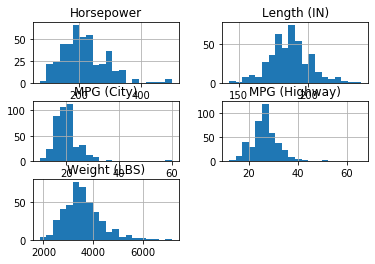

In [179]:
numerical_data.hist(bins = 20)

In [184]:
# Finding correlations with respect to MPG
numerical_data.corr()["MPG (City)"]

Horsepower      -0.676699
MPG (City)       1.000000
MPG (Highway)    0.941021
Weight (LBS)    -0.737966
Length (IN)     -0.501526
Name: MPG (City), dtype: float64

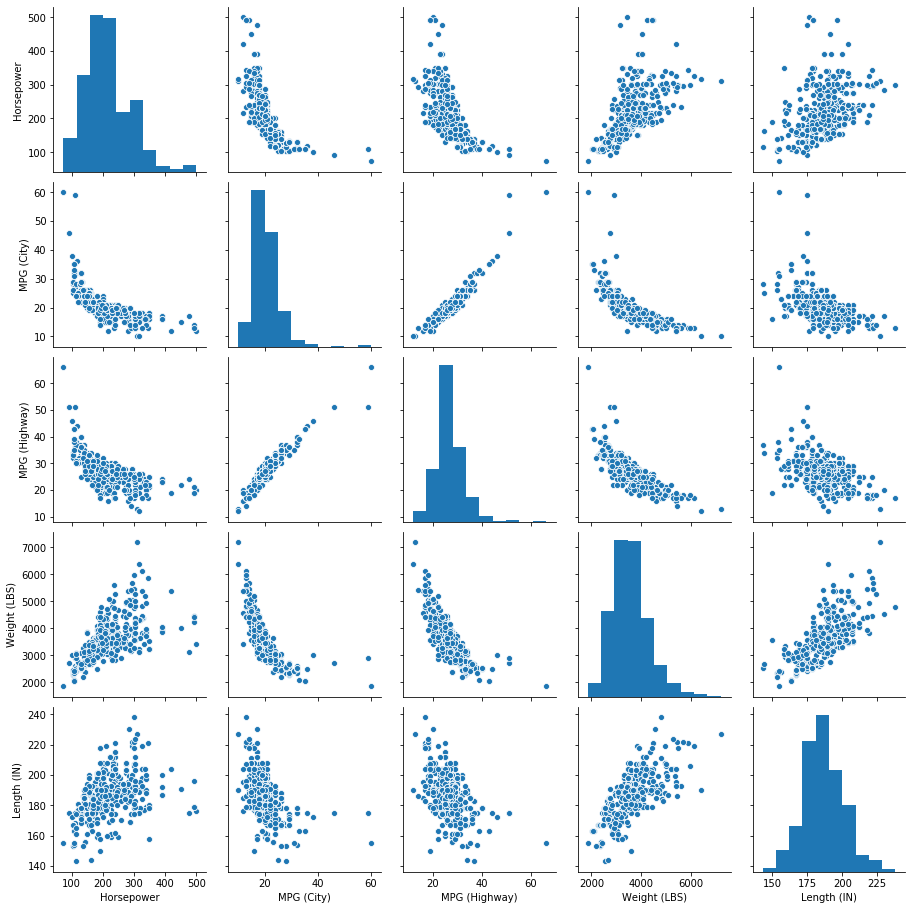

In [187]:
# Finding all correlations with pairpolt
sns.pairplot(numerical_data)

Negative and positive correlations are plotted and shown above, this gives us a generic idea about the features and it's dependence 

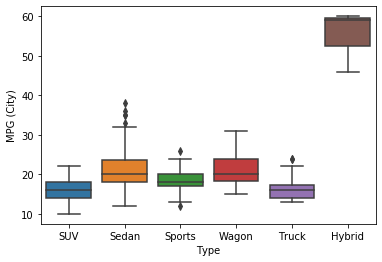

In [190]:
# Using Box plot to see the extreme values and data around the central tendency 
sns.boxplot(x="Type",y="MPG (City)", data = data)

It is seen that Hybrid (electric and/or fuel cars) vehicles are more economical 

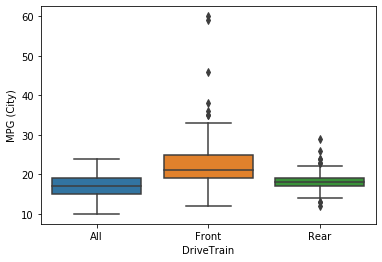

In [191]:
sns.boxplot(x="DriveTrain",y="MPG (City)", data = data)

The cars with front drive train gives more mileage

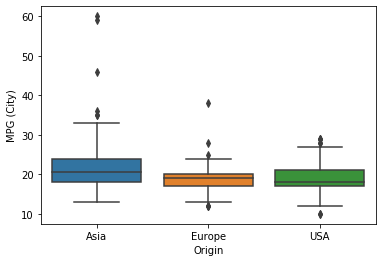

In [193]:
sns.boxplot(x="Origin",y="MPG (City)", data = data)

The cars who's R&D is Asia based are more concerned with MPG

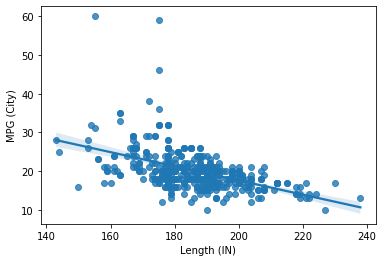

In [196]:
# Regression plot
sns.regplot(data[a"Length (IN)"],data["MPG (City)"])

Regression plot shows correlation and the least squared line which confirms that the realtionship is stong as the data points are close to the line